In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import re
import time
import numpy as np
import pandas as pd
import nltk
nltk.download("wordnet")
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /home/yuu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/yuu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/yuu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
data1 = pd.read_csv('data/lingSpam.csv')
data2 = pd.read_csv('data/enronSpamSubset.csv')
data3 = pd.read_csv('data/completeSpamAssassin.csv')

data1.drop("Unnamed: 0",inplace=True,axis=1)
data2.drop(["Unnamed: 0","Unnamed: 0.1"],inplace=True,axis=1)
data3.drop("Unnamed: 0",inplace=True,axis=1)

In [4]:
data = pd.concat([data1,data2,data3],axis=0)
data.head()

,Body,Label
0,Subject: great part-time or summer job !\n \n ...,1
1,Subject: auto insurance rates too high ?\n \n ...,1
2,Subject: do want the best and economical hunti...,1
3,Subject: email 57 million people for $ 99\n \n...,1
4,Subject: do n't miss these !\n \n attention ! ...,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18651 entries, 0 to 6045
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    18650 non-null  object
 1   Label   18651 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.1+ KB


In [6]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18650 entries, 0 to 6045
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    18650 non-null  object
 1   Label   18650 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.1+ KB


In [7]:
x = data["Body"]
x_clnd_link = [re.sub(r"http\S+", "", text) for text in x]

print(x_clnd_link[0])

Subject: great part-time or summer job !
 
 * * * * * * * * * * * * * * * we have display boxes with credit applications that we need to place in the small owner-operated stores in your area . here is what you do : 1 . introduce yourself to the store owner or manager . 2 . use our 90 % effective script which tells them how this little display box will save their customers hundreds of dollars , be a drawing card for their business , and make them from $ 5 . 00 to $ 15 . 00 or more for every app sent in . 3 . find a good spot on the counter , place the box there , and say that nothing more need be done , all you need is his name and address so the company can send him the commission checks . your compensaation will be $ 10 for every box you place . by becoming a representative you could also earn a commission of $ 10 for each application that came from that store . that is of course a much more profitable plan , as it will pay you for months or years for a very small effort . call 1-888 

In [8]:
pattern = "[^a-zA-Z0-9]"
x_cleaned = [re.sub(pattern," ",text) for text in x_clnd_link]

print(x_cleaned[0])

Subject  great part time or summer job                                    we have display boxes with credit applications that we need to place in the small owner operated stores in your area   here is what you do   1   introduce yourself to the store owner or manager   2   use our 90   effective script which tells them how this little display box will save their customers hundreds of dollars   be a drawing card for their business   and make them from   5   00 to   15   00 or more for every app sent in   3   find a good spot on the counter   place the box there   and say that nothing more need be done   all you need is his name and address so the company can send him the commission checks   your compensaation will be   10 for every box you place   by becoming a representative you could also earn a commission of   10 for each application that came from that store   that is of course a much more profitable plan   as it will pay you for months or years for a very small effort   call 1 888 

In [9]:
x_lowered = [text.lower() for text in x_cleaned]
print(x_lowered[0])

subject  great part time or summer job                                    we have display boxes with credit applications that we need to place in the small owner operated stores in your area   here is what you do   1   introduce yourself to the store owner or manager   2   use our 90   effective script which tells them how this little display box will save their customers hundreds of dollars   be a drawing card for their business   and make them from   5   00 to   15   00 or more for every app sent in   3   find a good spot on the counter   place the box there   and say that nothing more need be done   all you need is his name and address so the company can send him the commission checks   your compensaation will be   10 for every box you place   by becoming a representative you could also earn a commission of   10 for each application that came from that store   that is of course a much more profitable plan   as it will pay you for months or years for a very small effort   call 1 888 

In [10]:
x_tokenized = [nltk.word_tokenize(text) for text in x_lowered]


In [11]:
print(x_tokenized[0])

['subject', 'great', 'part', 'time', 'or', 'summer', 'job', 'we', 'have', 'display', 'boxes', 'with', 'credit', 'applications', 'that', 'we', 'need', 'to', 'place', 'in', 'the', 'small', 'owner', 'operated', 'stores', 'in', 'your', 'area', 'here', 'is', 'what', 'you', 'do', '1', 'introduce', 'yourself', 'to', 'the', 'store', 'owner', 'or', 'manager', '2', 'use', 'our', '90', 'effective', 'script', 'which', 'tells', 'them', 'how', 'this', 'little', 'display', 'box', 'will', 'save', 'their', 'customers', 'hundreds', 'of', 'dollars', 'be', 'a', 'drawing', 'card', 'for', 'their', 'business', 'and', 'make', 'them', 'from', '5', '00', 'to', '15', '00', 'or', 'more', 'for', 'every', 'app', 'sent', 'in', '3', 'find', 'a', 'good', 'spot', 'on', 'the', 'counter', 'place', 'the', 'box', 'there', 'and', 'say', 'that', 'nothing', 'more', 'need', 'be', 'done', 'all', 'you', 'need', 'is', 'his', 'name', 'and', 'address', 'so', 'the', 'company', 'can', 'send', 'him', 'the', 'commission', 'checks', 'yo

In [12]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /home/yuu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
x_lemmatized = [[lemma.lemmatize(word) for word in text] for text in x_tokenized]


In [14]:
print(x_lemmatized[0])

['subject', 'great', 'part', 'time', 'or', 'summer', 'job', 'we', 'have', 'display', 'box', 'with', 'credit', 'application', 'that', 'we', 'need', 'to', 'place', 'in', 'the', 'small', 'owner', 'operated', 'store', 'in', 'your', 'area', 'here', 'is', 'what', 'you', 'do', '1', 'introduce', 'yourself', 'to', 'the', 'store', 'owner', 'or', 'manager', '2', 'use', 'our', '90', 'effective', 'script', 'which', 'tell', 'them', 'how', 'this', 'little', 'display', 'box', 'will', 'save', 'their', 'customer', 'hundred', 'of', 'dollar', 'be', 'a', 'drawing', 'card', 'for', 'their', 'business', 'and', 'make', 'them', 'from', '5', '00', 'to', '15', '00', 'or', 'more', 'for', 'every', 'app', 'sent', 'in', '3', 'find', 'a', 'good', 'spot', 'on', 'the', 'counter', 'place', 'the', 'box', 'there', 'and', 'say', 'that', 'nothing', 'more', 'need', 'be', 'done', 'all', 'you', 'need', 'is', 'his', 'name', 'and', 'address', 'so', 'the', 'company', 'can', 'send', 'him', 'the', 'commission', 'check', 'your', 'com

In [15]:
stopwords = nltk.corpus.stopwords.words("english")
x_prepared = [[word for word in text if word not in stopwords] for text in x_lemmatized]

In [16]:
print(x_prepared[0])

['subject', 'great', 'part', 'time', 'summer', 'job', 'display', 'box', 'credit', 'application', 'need', 'place', 'small', 'owner', 'operated', 'store', 'area', '1', 'introduce', 'store', 'owner', 'manager', '2', 'use', '90', 'effective', 'script', 'tell', 'little', 'display', 'box', 'save', 'customer', 'hundred', 'dollar', 'drawing', 'card', 'business', 'make', '5', '00', '15', '00', 'every', 'app', 'sent', '3', 'find', 'good', 'spot', 'counter', 'place', 'box', 'say', 'nothing', 'need', 'done', 'need', 'name', 'address', 'company', 'send', 'commission', 'check', 'compensaation', '10', 'every', 'box', 'place', 'becoming', 'representative', 'could', 'also', 'earn', 'commission', '10', 'application', 'came', 'store', 'course', 'much', 'profitable', 'plan', 'pay', 'month', 'year', 'small', 'effort', 'call', '1', '888', '703', '5390', 'code', '3', '24', 'hour', 'receive', 'detail', 'removed', 'mailing', 'list', 'type', 'b2998', 'hotmail', 'com', 'area', 'remove', 'subject', 'area', 'new',

In [17]:
len(np.unique([word for text in x_prepared for word in text]))


144989

In [18]:
vectorizer = CountVectorizer(max_features=20000)
x = vectorizer.fit_transform([" ".join(text) for text in x_prepared]).toarray()



In [19]:
x.shape

(18650, 20000)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,np.asarray(data["Label"]),random_state=42,test_size=0.2)
x_train.shape

(14920, 20000)

In [21]:
start_time = time.time()
NB = GaussianNB()
NB.fit(x_train,y_train)
end_time = time.time()

print(round(end_time-start_time,2))

3.41


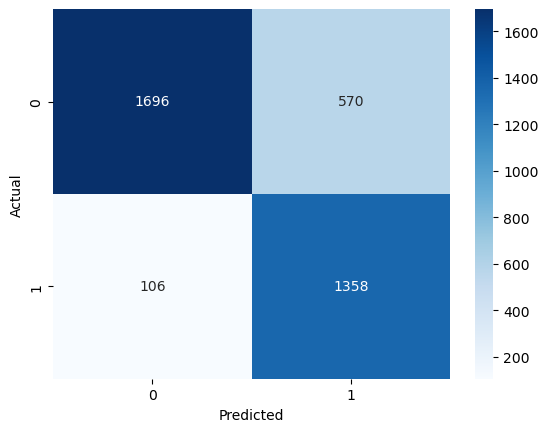

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = NB.predict(x_test)

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [35]:
from sklearn.metrics import f1_score

print("Accuracy:", NB.score(x_test,y_test))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.8187667560321715
F1 Score: 0.8007075471698113


In [25]:
import pickle
# We will save count vectorizer and model
with open("model.pckl",mode="wb") as F:
    pickle.dump(NB,F)

with open("vectorizer.pckl",mode="wb") as F:
    pickle.dump(vectorizer,F)

In [26]:
def predict_mail(mail):

    model = pickle.load(open("model.pckl",mode="rb"))
    vectorizer = pickle.load(open("vectorizer.pckl",mode="rb"))

    lemma = WordNetLemmatizer()

    stopwords = nltk.corpus.stopwords.words('english')

    mail = re.sub(r"http\S+", "", mail)
    mail = re.sub("[^a-zA-Z0-9]"," ",mail)
    mail = mail.lower()
    mail = nltk.word_tokenize(mail)
    mail = [lemma.lemmatize(word) for word in mail]
    mail = [word for word in mail if word not in stopwords]
    mail = " ".join(mail)

    vector = vectorizer.transform([mail])
    decision = model.predict(vector.toarray())

    return decision[0]



In [27]:
predict_mail("Flash sale: you can buy a laptop just with one dollar")

np.int64(1)